In [94]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
df=pd.read_csv('data/uec_data_2023_2025_full.csv')

## Regions

Map hospital to regions

In [95]:
hospital_to_region_dict = {
    "National":                       "National",
    "HSE Dublin and North East":           "HSE Dublin and North East",
    "HSE Dublin and Midlands":             "HSE Dublin and Midlands",
    "HSE Dublin and South East":           "HSE Dublin and South East",
    "HSE South West":                      "HSE South West",
    "HSE Mid West":                        "HSE Mid West",
    "HSE West and North West":             "HSE West and North West",
    # HSE Dublin and North East
    "Beaumont Hospital":                        "HSE Dublin and North East",
    "Cavan General Hospital":                   "HSE Dublin and North East",
    "Connolly Hospital":                        "HSE Dublin and North East",
    "Louth County Hospital":                    "HSE Dublin and North East",
    "Mater Misericordiae University Hospital":  "HSE Dublin and North East",
    "National Orthopaedic Hospital Cappagh":    "HSE Dublin and North East",
    "Our Lady of Lourdes Hospital":             "HSE Dublin and North East",
    "Our Lady's Hospital Navan":                "HSE Dublin and North East",

    # HSE Dublin and Midlands
    "CHI at Crumlin":                           "HSE Dublin and Midlands",
    "CHI at Tallaght":                          "HSE Dublin and Midlands",
    "CHI at Temple Street":                     "HSE Dublin and Midlands",
    "MRH Mullingar":                            "HSE Dublin and Midlands",
    "MRH Portlaoise":                           "HSE Dublin and Midlands",
    "MRH Tullamore":                            "HSE Dublin and Midlands",
    "Naas General Hospital":                    "HSE Dublin and Midlands",
    "St. James's Hospital":                     "HSE Dublin and Midlands",
    "St. Luke's Radiation Oncology Network":    "HSE Dublin and Midlands",
    "Tallaght University Hospital":             "HSE Dublin and Midlands",

    # HSE Dublin and South East
    "National Rehabilitation Hospital":         "HSE Dublin and South East",
    "St. Columcille's Hospital":                "HSE Dublin and South East",
    "St. Luke's General Hospital Kilkenny":     "HSE Dublin and South East",
    "St. Michael's Hospital":                   "HSE Dublin and South East",
    "St. Vincent's University Hospital":        "HSE Dublin and South East",
    "Tipperary University Hospital":            "HSE Dublin and South East",
    "UH Waterford":                             "HSE Dublin and South East",
    "Wexford General Hospital":                 "HSE Dublin and South East",

    # HSE South West
    "Bantry General Hospital":                      "HSE South West",
    "Cork University Hospital":                     "HSE South West",
    "Mallow General Hospital":                      "HSE South West",
    "Mercy University Hospital":                    "HSE South West",
    "South Infirmary Victoria University Hospital": "HSE South West",
    "UH Kerry":                                     "HSE South West",

    # HSE Mid West
    "Ennis Hospital":                               "HSE Mid West",
    "Nenagh Hospital":                              "HSE Mid West",
    "St. John's Hospital Limerick":                 "HSE Mid West",
    "UH Limerick":                                  "HSE Mid West",

    # HSE West and North West
    "Galway University Hospital":                   "HSE West and North West",
    "Letterkenny University Hospital":              "HSE West and North West",
    "Mayo University Hospital":                     "HSE West and North West",
    "Portiuncula University Hospital":              "HSE West and North West",
    "Roscommon University Hospital":                "HSE West and North West",
    "Sligo University Hospital":                    "HSE West and North West"
}


In [96]:
# remove the total suffix
df['Hospital_Stripped'] = df['Hospital'].str.removesuffix(' Total')
# map hospitals to regions in new column
df['Region'] = df['Hospital_Stripped'].map(hospital_to_region_dict)


## Total populations

In [97]:

df['weekday']= pd.to_datetime(df['Date'], dayfirst=True).dt.day_of_week
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Then sort by date to ensure proper order
df = df.sort_values('Date')


In [98]:
# get encatchment and turn into a dict
pop_df=pd.read_csv("data/encatchment_areas.csv")
pop_dict=dict(zip(pop_df.iloc[:, 0], pop_df.iloc[:, 1]))
# map Region -> population into new column 'Region_Population'
df['Region_Population'] = df['Region'].map(pop_dict)
# quick check of unmapped region values
#print("Unmapped region values:", df[df['Region_Population'].isna()]['Region'].dropna().unique())

Weight totals

In [99]:
df['Population Scaled Total']=df['Total']/df['Region_Population']

## Time series

<Axes: title={'center': 'Regional totals'}, xlabel='Date'>

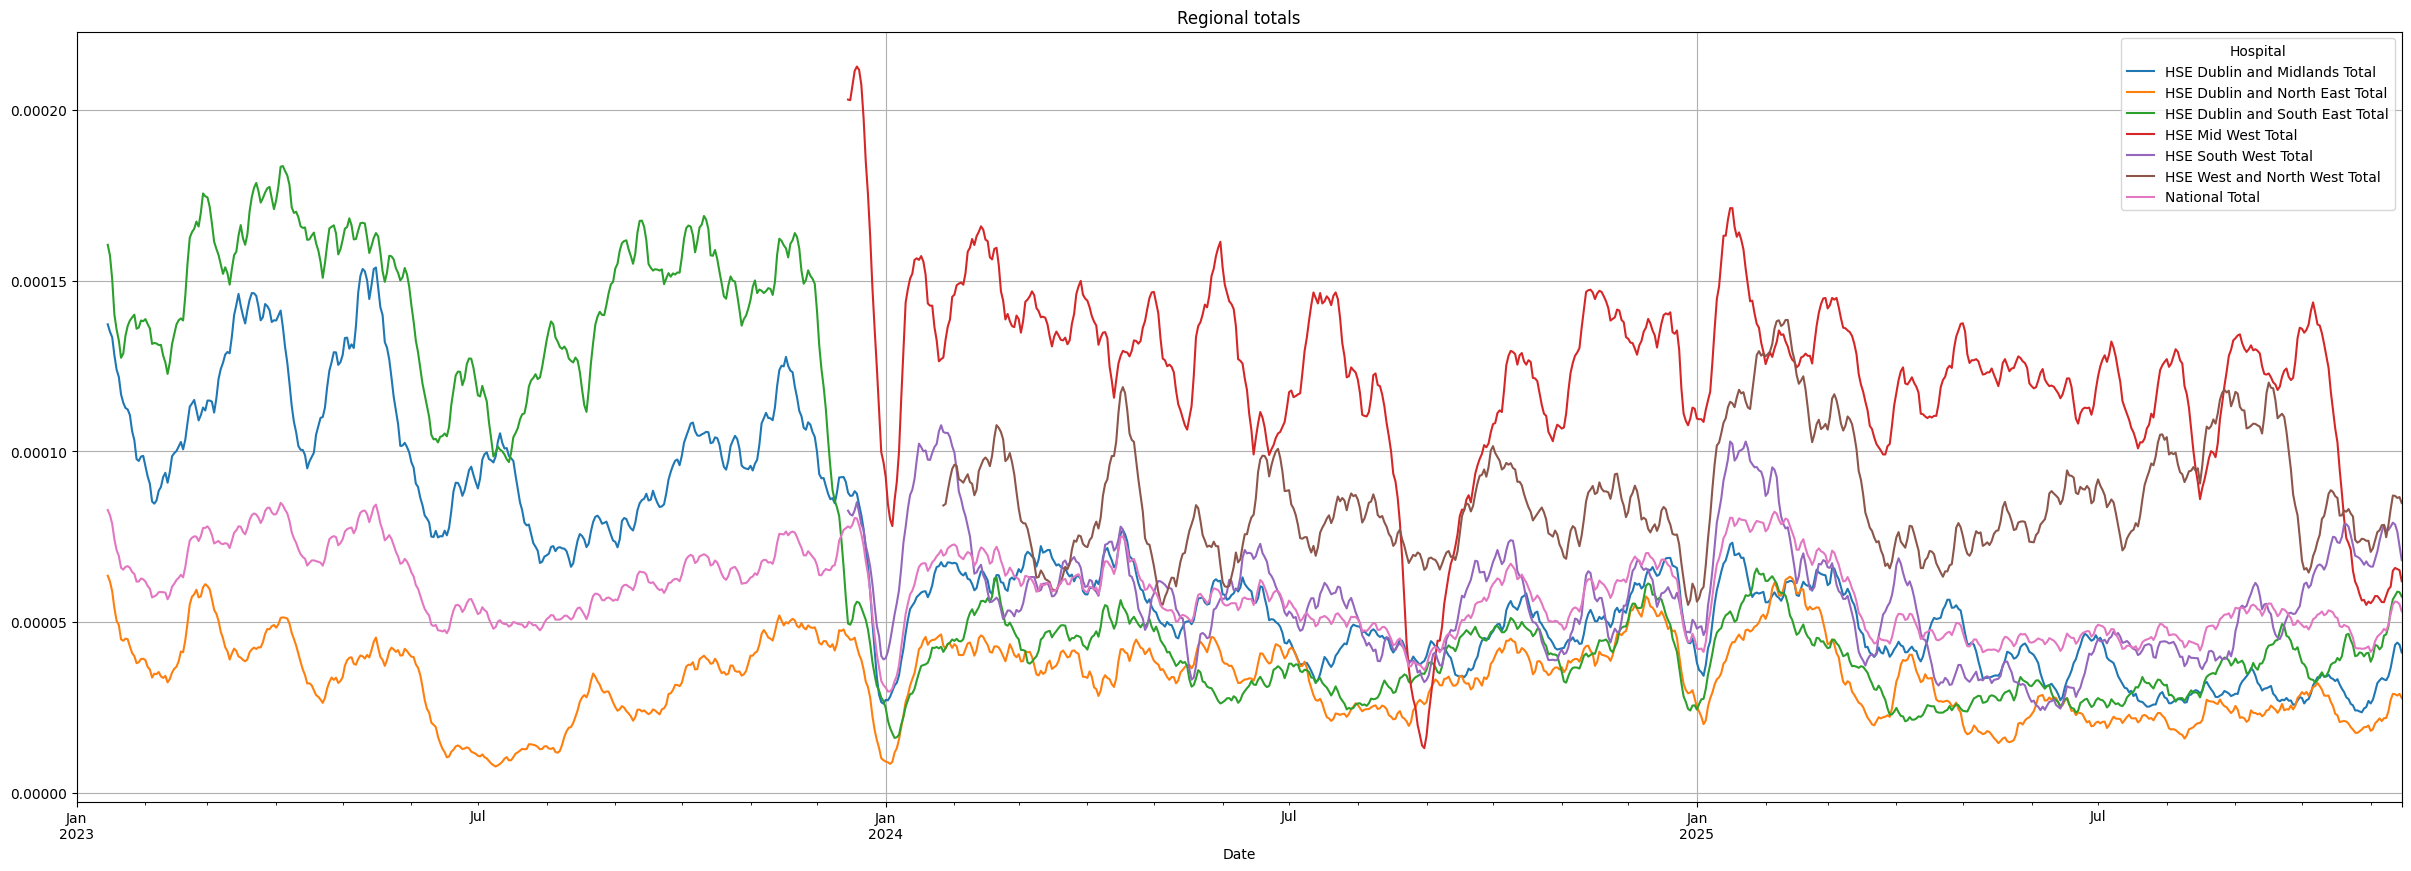

In [101]:
df[df["Hospital"].str.contains("Total")].pivot_table(
      index='Date',
      columns='Hospital',
      values='Population Scaled Total'
  ).rolling(window=15).mean().plot(figsize=(30,10), grid=True, legend=True, title="Regional totals")

/var/folders/8p/bnwtr4b93fn3_th1x9ysmwy00000gn/T/ipykernel_10106/2811312171.py:1: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  df[df["Hospital"].str.contains("Total")].groupby(["weekday","Hospital"])['Population Scaled Total'].mean().unstack().plot(figsize=(10,10), grid=True, legend=True, title="Regional totals").set_xticklabels(labels=['',"Mon",'Tues','Wed','Thur','Fri','Sat','Sun'])


[Text(-1.0, 0, ''),
 Text(0.0, 0, 'Mon'),
 Text(1.0, 0, 'Tues'),
 Text(2.0, 0, 'Wed'),
 Text(3.0, 0, 'Thur'),
 Text(4.0, 0, 'Fri'),
 Text(5.0, 0, 'Sat'),
 Text(6.0, 0, 'Sun'),
 Text(7.0, 0, '')]

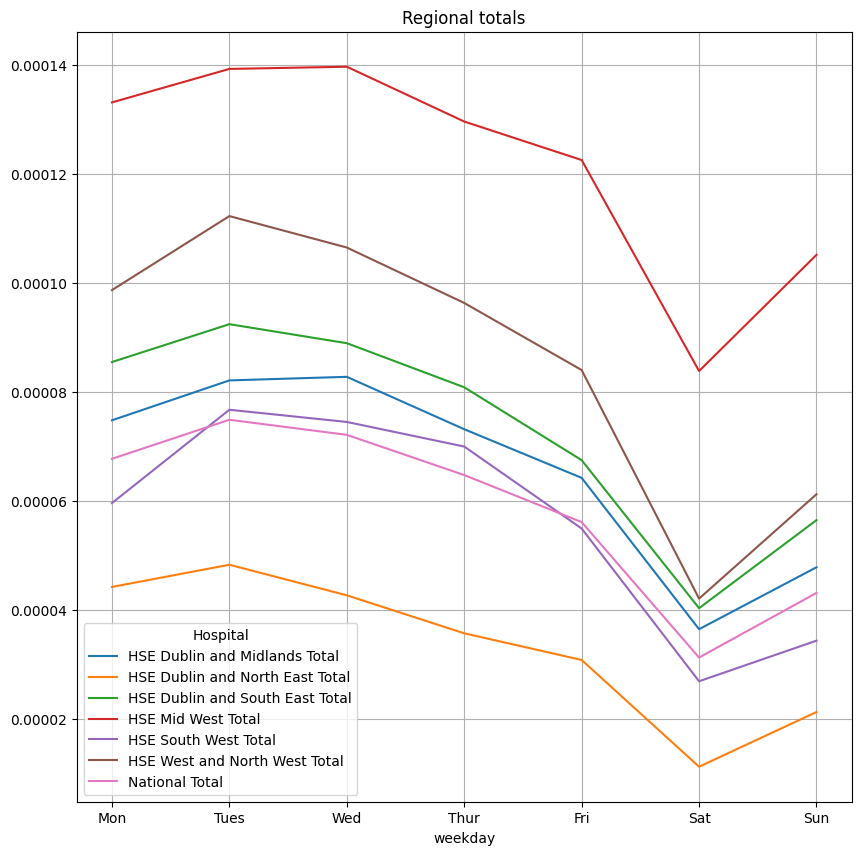

In [84]:
df[df["Hospital"].str.contains("Total")].groupby(["weekday","Hospital"])['Population Scaled Total'].mean().unstack().plot(figsize=(10,10), grid=True, legend=True, title="Regional totals").set_xticklabels(labels=['',"Mon",'Tues','Wed','Thur','Fri','Sat','Sun'])

In [93]:
df[df["Date"]=="2023-01-01"]["Region"].unique()

array(['HSE Dublin and North East', 'National', 'HSE West and North West',
       'HSE Dublin and South East', 'HSE Mid West', 'HSE South West',
       'HSE Dublin and Midlands', nan], dtype=object)

In [91]:
df["Region"].unique()

array(['HSE Dublin and North East', 'National', 'HSE West and North West',
       'HSE Dublin and South East', 'HSE Mid West', 'HSE South West',
       'HSE Dublin and Midlands', nan], dtype=object)

HSE Mid West was created in the end of 2023
They also shuffled hospitals around
St Luke's General Hospital Kilkenny
HSE Dublin & Midlands > HSE Dublin & South East